In [12]:
!apt update && apt install -y ffmpeg

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,197 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,563 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,517 kB]
Hit:13 https://ppa.launchpadcontent.ne

In [13]:
!pip install pandas  matplotlib datetime chardet numpy scikit-learn

In [23]:
import pandas as pd

# Use 'windows-1251' encoding to read the file
df = pd.read_csv("1.csv", encoding='windows-1251', delimiter=';')

# Print the column names
print("Column names:", df.columns.tolist())

Column names: ['GRS', 'январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']


In [25]:
import pandas as pd
import chardet

# Detect the encoding of the file
with open("1.csv", 'rb') as f:
    result = chardet.detect(f.read())

print(result)  # This will show the detected encoding

# Use the detected encoding to read the file
df = pd.read_csv("1.csv", encoding='windows-1251', delimiter=';')


print (df)

{'encoding': 'MacCyrillic', 'confidence': 0.961268225410461, 'language': 'Russian'}
       GRS     январь    февраль       март     апрель        май       июнь  \
0  Miller1  8 864 501  7 756 242  5 834 508  4 427 361  2 987 754  2 326 822   
1  Miller2  2 954 833  2 585 414  1 944 836  1 475 787    995 918    775 607   
2    Malch    1139974  1 001 476    756 234    486 299    204 383     65 714   
3     Kash    1395502  1 224 052  1 004 493    577 939    391 019    165 028   
4     Tern    1768384  1 555 774  1 153 816    698 141    282 818     83 599   
5    Taras    2660340  2 314 567  1 709 906  1 059 785    425 531    126 579   
6    Meshk    2476983  2 100 951  1 735 485  1 276 439    542 709    203 177   
7   Zubril     772820    772 666    511 576    311 932    144 079     52 287   
8  Shedrov    3720482  3 248 478  2 420 809  1 477 249    621 621    201 853   
9    Shran    2012952  1 745 580  1 353 239    805 293    342 801    131 320   

        июль     август   сентябрь 

In [27]:
# Convert values to numeric, handling space-separated thousands
for col in df.columns[1:]:  # Skip the first column ('GRS')
    df[col] = df[col].str.replace(' ', '').astype(float)

# Verify the DataFrame
print(df.head())

       GRS     январь    февраль       март     апрель        май       июнь  \
0  Miller1  8864501.0  7756242.0  5834508.0  4427361.0  2987754.0  2326822.0   
1  Miller2  2954833.0  2585414.0  1944836.0  1475787.0   995918.0   775607.0   
2    Malch  1139974.0  1001476.0   756234.0   486299.0   204383.0    65714.0   
3     Kash  1395502.0  1224052.0  1004493.0   577939.0   391019.0   165028.0   
4     Tern  1768384.0  1555774.0  1153816.0   698141.0   282818.0    83599.0   

        июль     август   сентябрь    октябрь     ноябрь    декабрь  
0  2287888.0  2182261.0  2139378.0  4747716.0  6237633.0  7955998.0  
1   762629.0   727420.0   713126.0  1582572.0  2079211.0  2651999.0  
2    42678.0    38695.0   110201.0   494671.0   754082.0  1051546.0  
3   191879.0   170948.0   315881.0   734932.0   947056.0  1326723.0  
4    84866.0    80184.0   178235.0   759900.0  1131602.0  1608667.0  


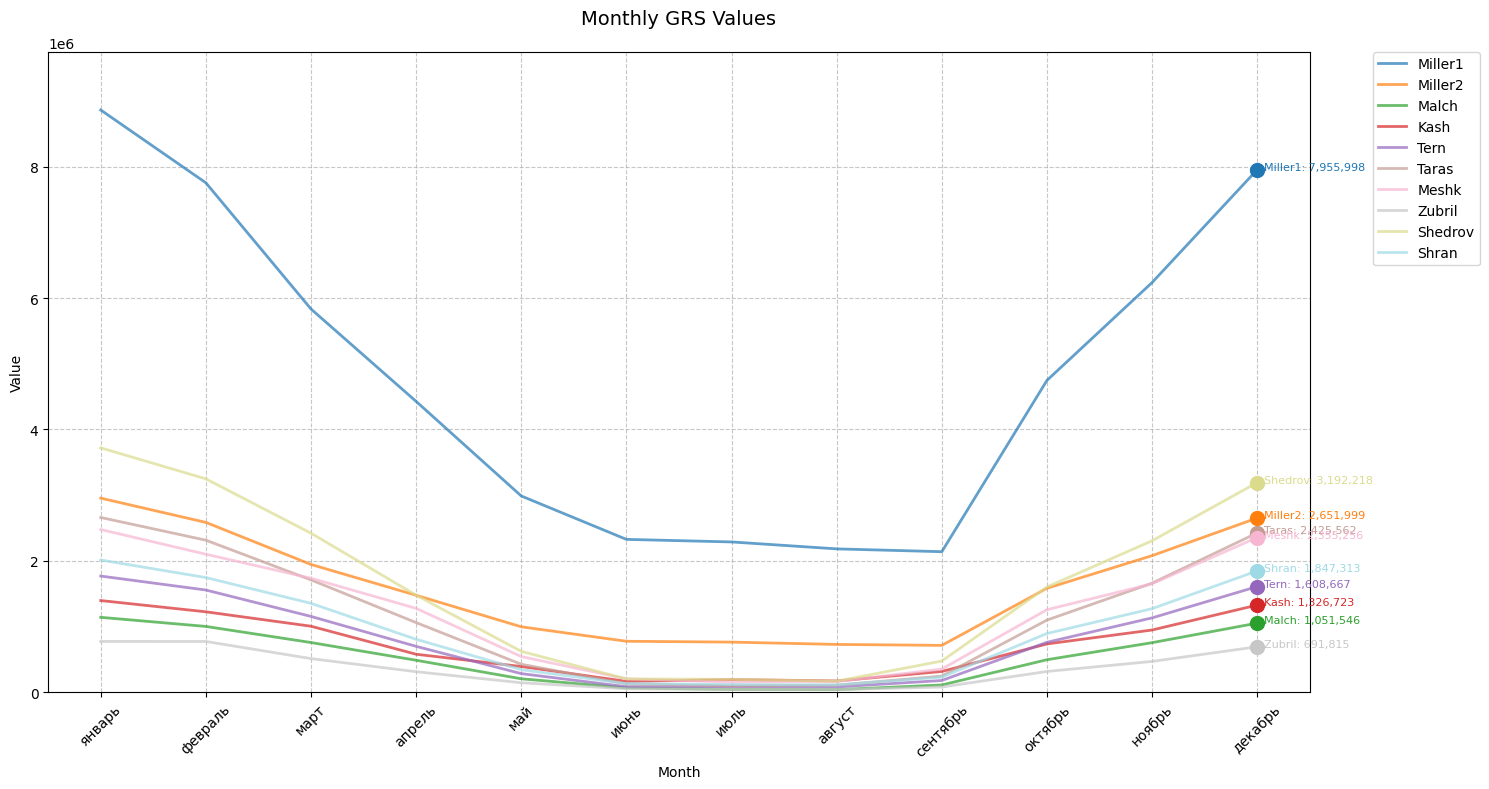

In [28]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Prepare the data
months = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь',
          'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Create color map for each GRS
colors = plt.cm.tab20(np.linspace(0, 1, len(df['GRS'])))
color_map = dict(zip(df['GRS'], colors))

# Animation function
def animate(frame):
    ax.clear()

    # Plot data up to current month
    current_months = months[:frame+1]

    for grs in df['GRS']:
        values = df[df['GRS'] == grs][current_months].iloc[0]
        x_points = range(len(current_months))

        # Always plot the current point
        ax.scatter(x_points[-1], values.iloc[-1],
                   color=color_map[grs], s=100, zorder=5)

        # If we have more than one point, draw the line
        if len(current_months) > 1:
            ax.plot(x_points, values,
                   label=grs, color=color_map[grs],
                   linewidth=2, alpha=0.7)
        else:
            # For the first point, add to legend
            ax.scatter([], [], label=grs, color=color_map[grs])

        # Add value label at the current point
        if len(current_months) > 0:
            last_value = values.iloc[-1]
            ax.annotate(f'{grs}: {last_value:,.0f}',
                       xy=(len(current_months)-1, last_value),
                       xytext=(5, 0), textcoords='offset points',
                       fontsize=8, color=color_map[grs])

    # Customize the plot
    ax.set_title('Monthly GRS Values', fontsize=14, pad=20)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

    # Set x-axis labels and limits
    ax.set_xticks(range(len(months)))  # Show all month positions
    ax.set_xticklabels(months, rotation=45)
    ax.set_xlim(-0.5, len(months) - 0.5)

    # Set y-axis limits
    ax.set_ylim(0, df[months].max().max() * 1.1)

    plt.tight_layout()

# Create animation
anim = animation.FuncAnimation(fig, animate, frames=len(months),
                              interval=500, repeat=True)

# Save the animation
anim.save('grs_animation.mp4', writer='ffmpeg', fps=2)

# Show the plot
plt.show()